In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import*

In [27]:
df=pd.read_csv('C:\\Users\\naiki\\OneDrive\\Desktop\\preterm birth prediction.csv')
df

Count Contraction  lenght of contraction        STD  Entropy  \
0               11055                 218320  53231.010    1.860   
1                9118                 222820  62367.488    1.580   
2                7925                  13481  60503.050    2.067   
3               12451                  17474  53628.078    1.731   
4               11152                 218320  53317.910    1.857   
5                6029                  63781  59177.965    1.701   
6               10052                  22310  54431.030    1.790   
7                9101                 219830  63467.583    1.490   
8                7929                  13192  61503.160    2.067   
9               12452                  16473  54678.091    1.701   
10              11121                 228321  52901.880    1.777   
11               6179                  65782  62177.988    1.991   
12               2012                  12483  32901.880    0.901   
13               1812                  10489  30905.820    1.210   
14               1919                  11297  31902.320    1.320   
15               2012                  12483  32901.880    0.901   
16               1812                  11481  29205.840    1.310   
17               1829                  11296  31902.320    1.020   
18               2119                  12298  32103.350    1.120   
19                714                   6185  57003.089    0.701   
20                694                  10226  40605.810    0.821   
21                614                  10143  49114.330    0.832   
22                674                   6185  42902.890    0.901   
23                615                   6388  49406.860    0.881   
24                625                   6351  41912.340    0.892   
25                428                   6283  39206.370    0.618   
26                435                   5308  47003.089    0.501   
27                428                   3388  39103.320    0.524   
28                545                   3308  39104.320    0.537   
29                448                   3315  39206.370    0.504   
30                495                   3328  47003.089    0.581   
31                415                   3355  41103.320    0.592   
32                495                   3348  42104.320    0.519   
33                525                   3608  49206.370    0.529   
34                415                   3309  47003.089    0.539   
35                465                   3238  52103.140    0.524   
36                425                   2308  51104.320    0.591   
37                501                   2308  54206.370    0.598   
38                412                   2308  51003.089    0.509   
39                415                   2308  59103.320    0.498   
40                465                   2358  49104.320    0.488   
41                425                   2333  52206.370    0.475   
42                380                   2334  57003.089    0.479   
43                323                   2339  49103.320    0.498   
44                222                   2675  59104.320    0.477   
45                321                   2456  59206.370    0.458   
46                334                   2682  57003.089    0.445   
47                321                   2901  49103.320    0.469   
48                345                   2932  51104.320    0.488   
49                320                   2963  43102.120    0.457   
50                349                   2333  58013.079    0.428   
51                395                   2334  49208.120    0.445   
52                398                   2339  51124.340    0.469   
53                321                   2675  46107.090    0.499   
54                398                   2339  51122.310    0.469   
55                321                   2675  46108.180    0.498   
56                398                   2336  51224.370    0.459   
57                323                   2641  46102.170    0

In [28]:
df.head()


Count Contraction  lenght of contraction        STD  Entropy  \
0              11055                 218320  53231.010    1.860   
1               9118                 222820  62367.488    1.580   
2               7925                  13481  60503.050    2.067   
3              12451                  17474  53628.078    1.731   
4              11152                 218320  53317.910    1.857   

   Contraction times  Pre-term  
0                  2         1  
1                  2         1  
2                  2         1  
3                  2         1  
4                  2         1

In [29]:
df.tail()

Count Contraction  lenght of contraction       STD  Entropy  \
53                321                   2675  46107.09    0.499   
54                398                   2339  51122.31    0.469   
55                321                   2675  46108.18    0.498   
56                398                   2336  51224.37    0.459   
57                323                   2641  46102.17    0.439   

    Contraction times  Pre-term  
53                  0         0  
54                  0         0  
55                  0         0  
56                  0         0  
57                  0         0

In [30]:
df.describe()

Count Contraction  lenght of contraction           STD    Entropy  \
count          58.000000              58.000000     58.000000  58.000000   
mean         2503.810345           26621.965517  48564.968190   0.879759   
std          3788.639864           61527.769917   8952.845551   0.528180   
min           222.000000            2308.000000  29205.840000   0.428000   
25%           398.000000            2649.500000  42303.962500   0.490500   
50%           495.000000            3371.500000  49307.490000   0.586000   
75%          1988.750000           12093.750000  54374.865000   1.187500   
max         12452.000000          228321.000000  63467.583000   2.067000   

       Contraction times   Pre-term  
count          58.000000  58.000000  
mean            0.637931   0.327586  
std             0.809988   0.473432  
min             0.000000   0.000000  
25%             0.000000   0.000000  
50%             0.000000   0.000000  
75%             1.000000   1.000000  
max             2.000000   1.000000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB


In [32]:
missing_data= df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0])*100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate=df[df.duplicated()]
print("Duplicate rows:")
duplicate
df= df.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate rows:


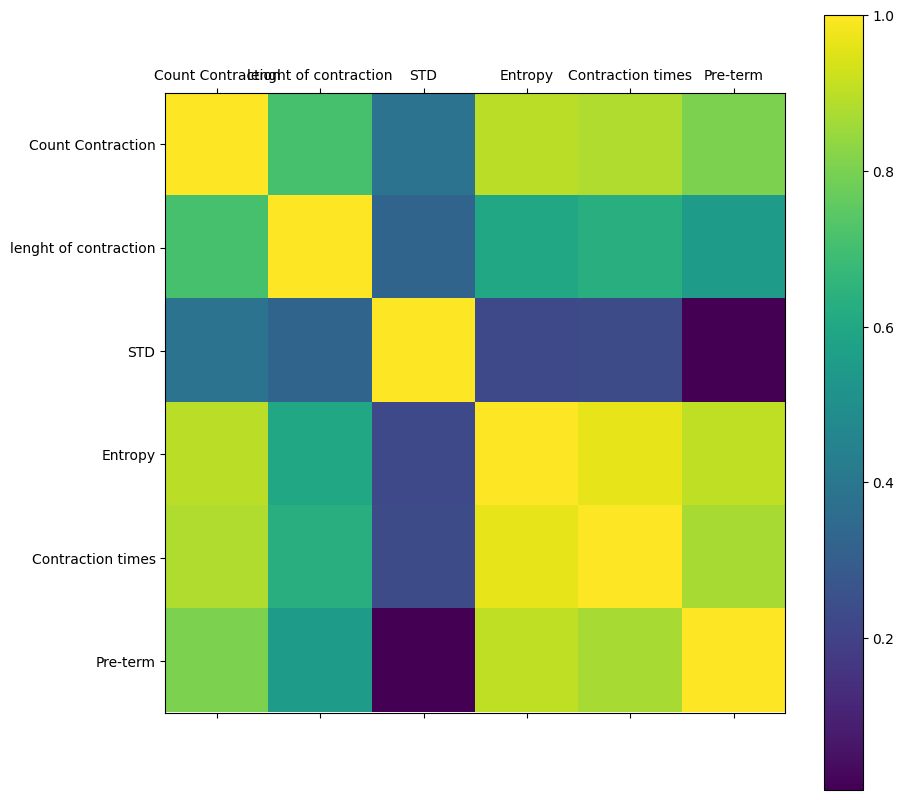

In [33]:
rcParams['figure.figsize']=10,10
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [35]:
df.corr()

Count Contraction  lenght of contraction       STD  \
Count Contraction               1.000000               0.709663  0.382338   
lenght of contraction           0.709663               1.000000  0.324129   
STD                             0.382338               0.324129  1.000000   
Entropy                         0.896738               0.599133  0.225340   
Contraction times               0.882798               0.630744  0.235322   
Pre-term                        0.805483               0.555893  0.005164   

                        Entropy  Contraction times  Pre-term  
Count Contraction      0.896738           0.882798  0.805483  
lenght of contraction  0.599133           0.630744  0.555893  
STD                    0.225340           0.235322  0.005164  
Entropy                1.000000           0.964394  0.904958  
Contraction times      0.964394           1.000000  0.869718  
Pre-term               0.904958           0.869718  1.000000

In [36]:
corr = df.corr()

# Convert correlation values to percentages
corr_percent = corr * 100

# Display with a color gradient for better visualization
corr_percent.style.background_gradient(cmap='coolwarm').format("{:.1f}%")

In [37]:
X = df.drop(['Pre-term'], axis = 1)
y = df['Pre-term']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,random_state= 0)
print("XTrain->",X_train.shape[0],"XTest->",X_test.shape[0], "YTrain->",y_train.shape[0], "YTest->",y_test.shape[0])

      

XTrain-> 39 XTest-> 18 YTrain-> 39 YTest-> 18


In [38]:
knn_scores = []
for k in range(2,21):
    from sklearn.neighbors import KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score=round(knn_classifier.score(X_test.values, y_test.values),2)
    knn_scores.append(knn_score)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_score=knn_classifier.predict(X_test)
print(classification_report(y_test,knn_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Text(0.5, 1.0, 'KNN Scores for different K neighbors')

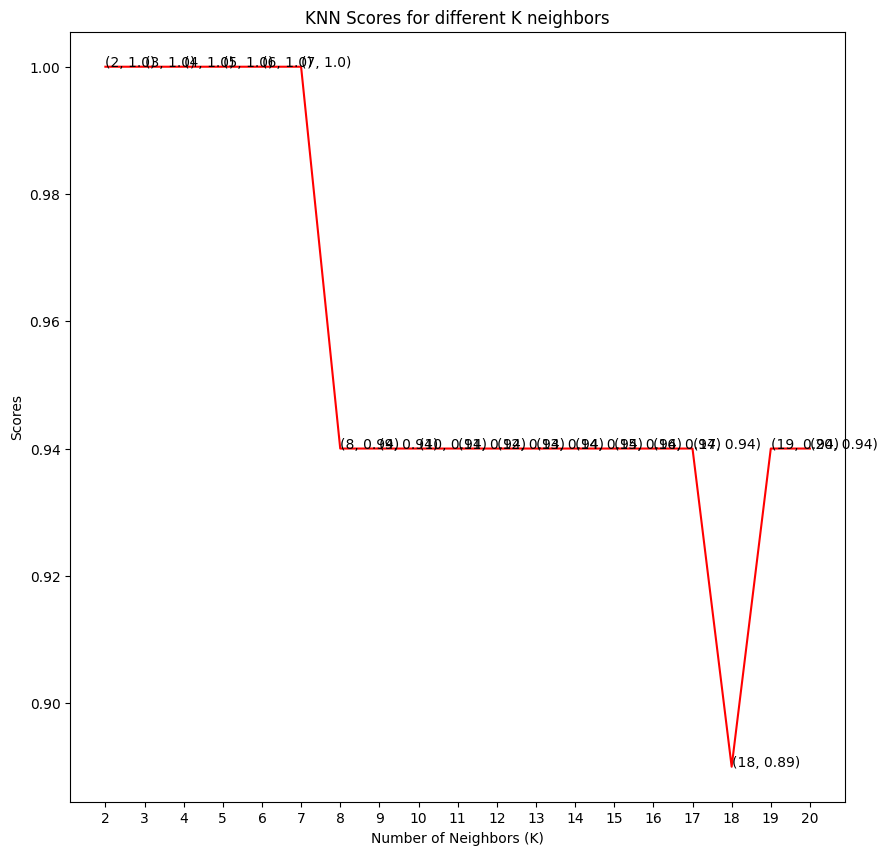

In [39]:
plt.plot([k for k in range(2,21)],knn_scores, color = 'red')
for i in range(2,21):
    plt.text(i,knn_scores[i-2], (i,knn_scores[i-2]))
plt.xticks([i for i in range(2,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('KNN Scores for different K neighbors')

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(X_test.values, y_test.values),2))

svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(X_train.values, y_train.values)
svc_prediction_result=svc_classifier.predict(X_test.values)
print(accuracy_score(y_test.values,svc_prediction_result))
    

1.0


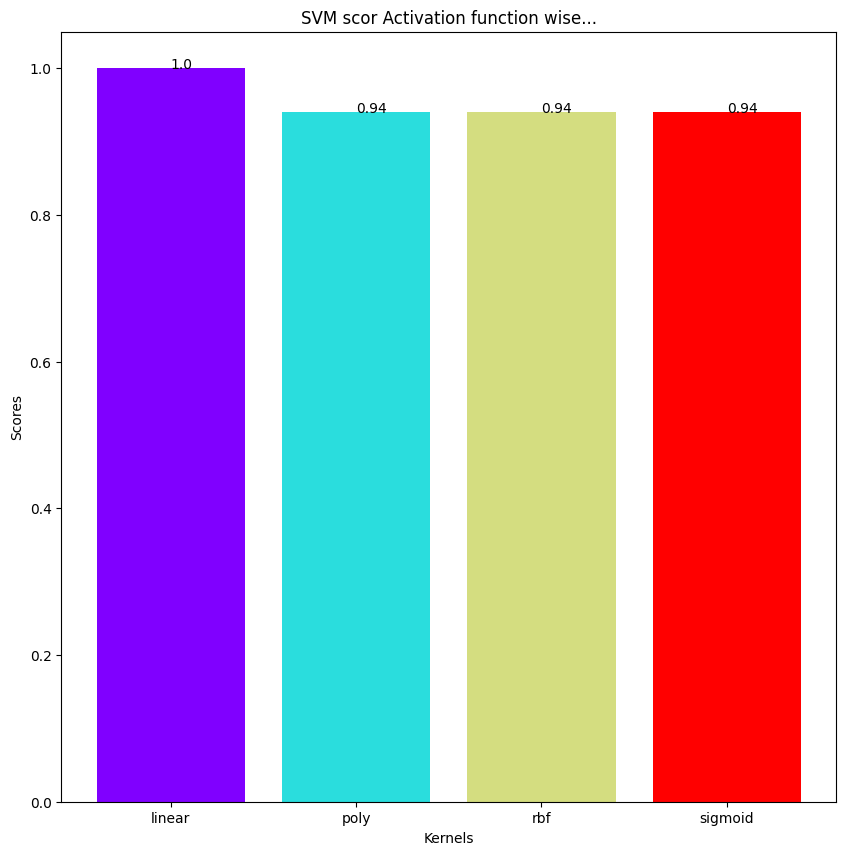

In [41]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    plt.xlabel('Kernels')
    plt.ylabel('Scores')
    plt.title('SVM scor Activation function wise...')

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) +1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(X_test.values, y_test.values),2))
print("Done")

Done


In [43]:
print(dt_scores)

[1.0, 1.0, 1.0, 1.0, 1.0]


In [44]:
dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
dt_classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

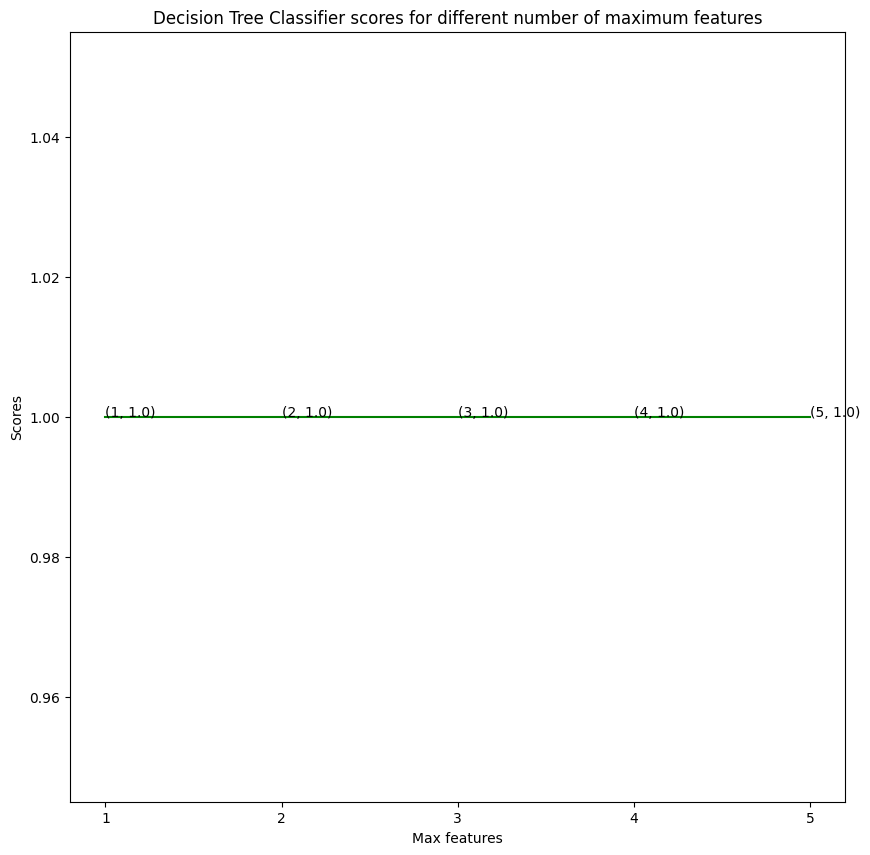

In [45]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) +1):
    plt.text(i, dt_scores[i-1], (i,dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [46]:
#Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train.values, y_train.values)
rf_scores = []
estimators = [10,20,100,200,500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state =0 )
    rf_classifier.fit(X_train.values, y_train.values)
    rf_scores.append(round(rf_classifier.score(X_test.values, y_test.values),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

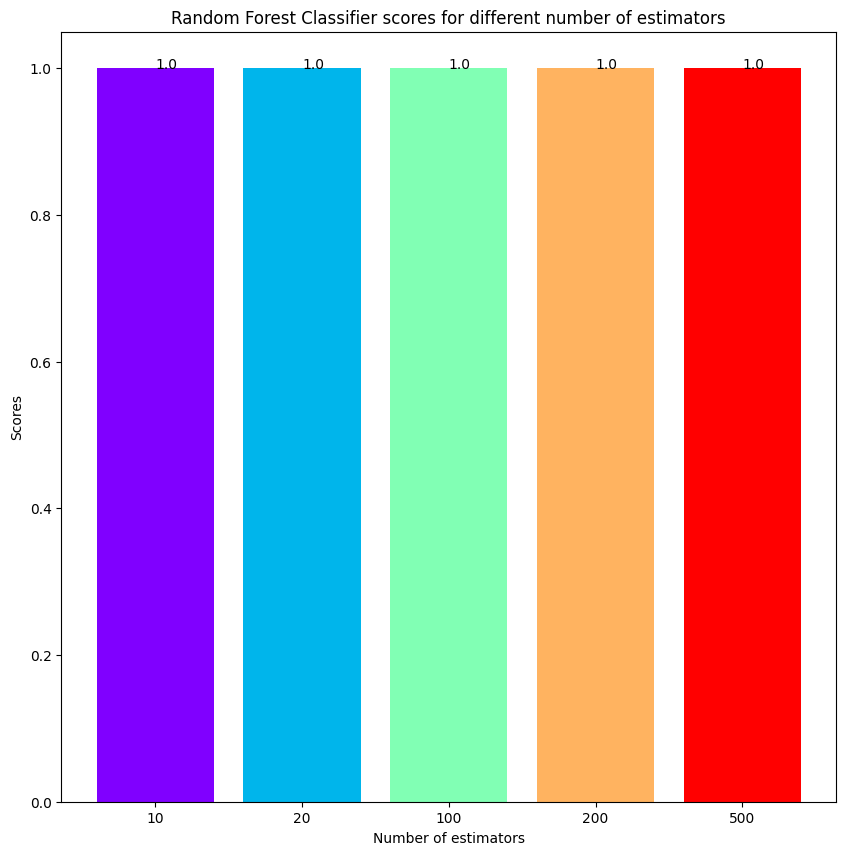

In [47]:
colors = rainbow(np.linspace(0,1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [48]:
#Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, y_train.values)
logistic_model_prediction=logistic_model.predict(X_test.values)
print(accuracy_score(y_test.values,logistic_model_prediction))
print(classification_report(y_test.values,logistic_model_prediction))

<IPython.core.display.Javascript object>

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [49]:
#Save Trained model
import pickle
all_models=[rf_model,logistic_model,dt_classifier,svc_classifier,knn_classifier]
#pikle.dump(logistic_model,open("models.pkl","wb"))
#pickle.dump(rf_classifier,open("models.pkl","wb"))
with open("models.pkl", 'wb') as files:
    pickle.dump(all_models, files)
print("Done")

Done


In [50]:
open_file = open("models.pkl", "rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[RandomForestClassifier(random_state=0), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear'), KNeighborsClassifier()]
Done
